# Regression 2
Simple liear regression with more and complex data

## Exploring the Data Removing the Outliers

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t  # Import t for the t-distribution
from sklearn.datasets import fetch_california_housing # Importing data

# Load the California housing dataset
data = fetch_california_housing()

In [2]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
# Assuming 'data' is already loaded as in the previous code snippet
df = pd.DataFrame(data.data, columns=data.feature_names)

df['House Value'] = data.target
df['Median Income'] = df['MedInc']

# Select the first feature and the target
df = df[['Median Income', 'House Value']]
df.head()

df_save = df.copy() # Sace a copy of the original dataframe

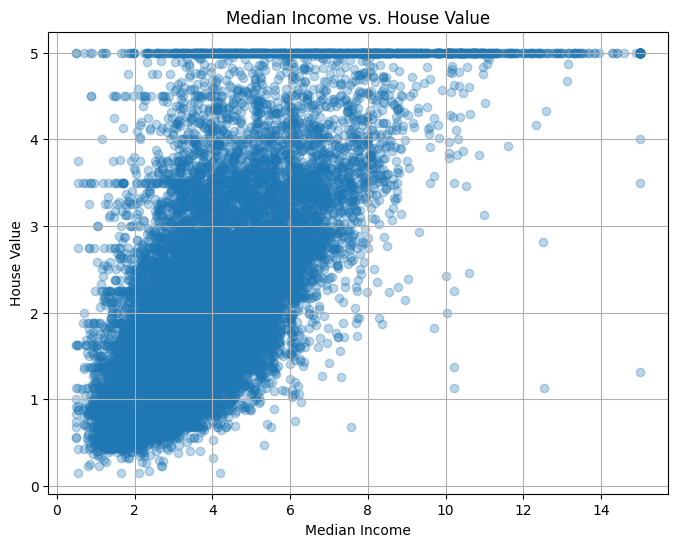

In [4]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Median Income'], df['House Value'], alpha=0.3)  # alpha for transparency
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Median Income vs. House Value")
plt.grid(True)
plt.show()

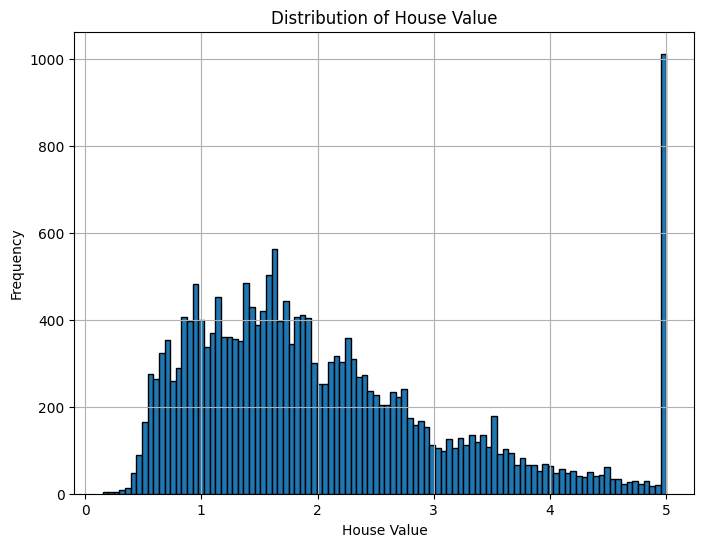

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['House Value'], bins=100, edgecolor='black')
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.title("Distribution of House Value")
plt.grid(True)
plt.show()

**Note**: The House Value data is skewed, there are a lot of outliers which can effect our model performance.

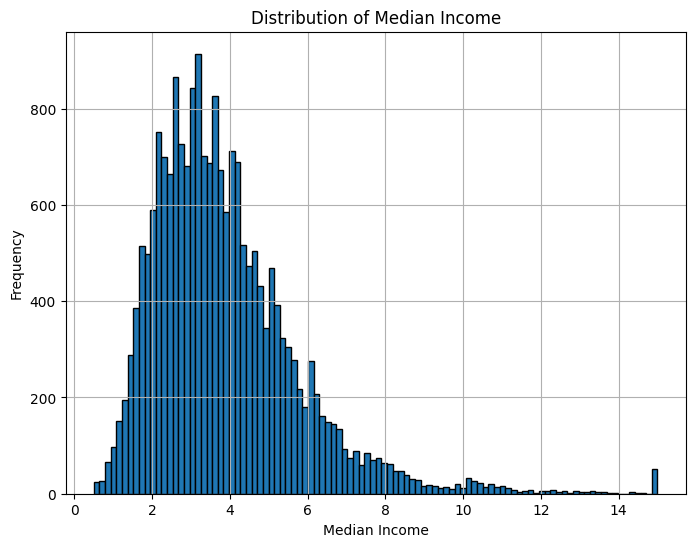

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['Median Income'], bins=100, edgecolor='black')
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Distribution of Median Income")
plt.grid(True)
plt.show()

**Note**: The Median Income data is skewed, there are a lot of outliers which can effect our model performance.

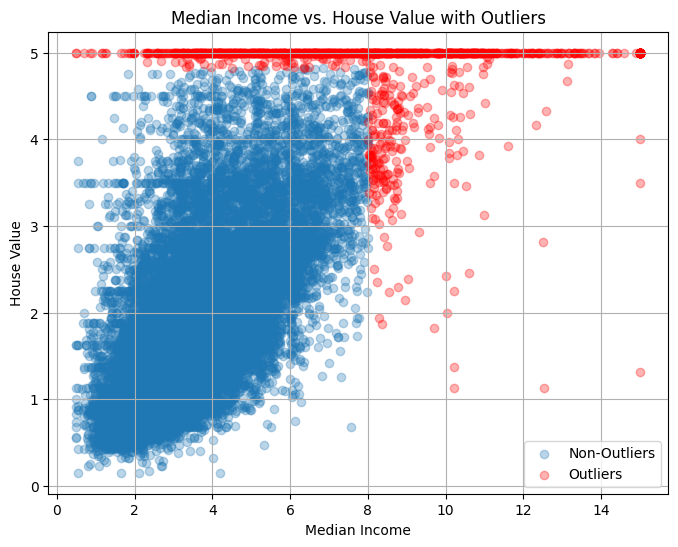

In [7]:
# Calculate the IQR and define boundaries for outliers
def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply the function to each column
bounds = {col: calculate_iqr_bounds(df[col]) for col in ['Median Income', 'House Value']}

# Identify outliers for both columns
outliers = df[
    (df['Median Income'] < bounds['Median Income'][0]) |
    (df['Median Income'] > bounds['Median Income'][1]) |
    (df['House Value'] < bounds['House Value'][0]) |
    (df['House Value'] > bounds['House Value'][1])
]

outliers_median_income = df[
    (df['Median Income'] < bounds['Median Income'][0]) |
    (df['Median Income'] > bounds['Median Income'][1])
]

outliers_house_value = df[
    (df['House Value'] < bounds['House Value'][0]) |
    (df['House Value'] > bounds['House Value'][1])
]

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot non-outlier points
non_outliers = df.loc[~df.index.isin(outliers.index)]
plt.scatter(non_outliers['Median Income'], non_outliers['House Value'], alpha=0.3, label='Non-Outliers')

# Plot outlier points in red
plt.scatter(outliers['Median Income'], outliers['House Value'], color='red', alpha=0.3, label='Outliers')

plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Median Income vs. House Value with Outliers")
plt.grid(True)
plt.legend()  # Add a legend
plt.show()


**Note**: Before removing the outliers, let's make some inference on the outliers.

In [8]:
# Filter rows where Median Income > 8
high_income = df[df['Median Income'] > 8]

# Filter rows where House Value >= 5 within high_income
high_income_high_value = high_income[high_income['House Value'] >= 5]

# Calculate the percentage
percentage = (len(high_income_high_value) / len(high_income)) * 100

print(f"Percentage of Median Income > 8 with House Value = 5: {percentage:.2f}%")

Percentage of Median Income > 8 with House Value = 5: 63.91%


In [9]:
# Filter rows where House Value >= 5
high_value_houses = df[df['House Value'] >= 5]

# Filter rows where Median Income > 8 within high_value_houses
high_value_high_income = high_value_houses[high_value_houses['Median Income'] > 8]

# Calculate the percentage
percentage = (len(high_value_high_income) / len(high_value_houses)) * 100

print(f"Percentage of House Value >= 5 with Median Income > 8: {percentage:.2f}%")

Percentage of House Value >= 5 with Median Income > 8: 44.46%


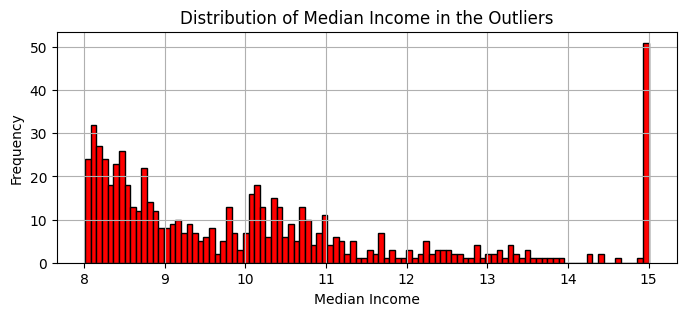

In [10]:
plt.figure(figsize=(8, 3))
plt.hist(outliers_median_income['Median Income'], bins=100, edgecolor='black', color='red')

plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Distribution of Median Income in the Outliers")
plt.grid(True)
plt.show()

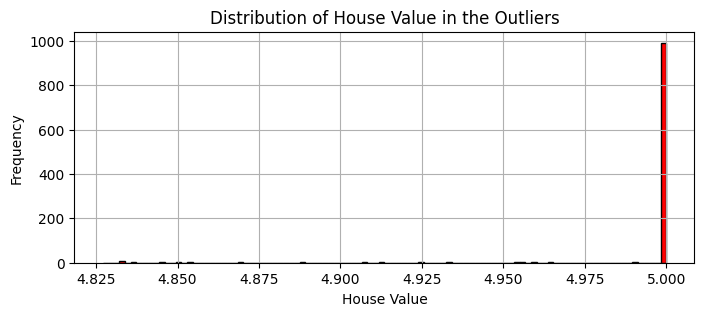

In [11]:
plt.figure(figsize=(8, 3))
plt.hist(outliers_house_value['House Value'], bins=100, edgecolor='black', color='red')
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.title("Distribution of House Value in the Outliers")
plt.grid(True)
plt.show()

In [12]:
print('House Value IQR upper bound: ', bounds['House Value'][1])
print(f"Ratio of the house values that are grater than the upper bound : {len(outliers[outliers['House Value'] > bounds['House Value'][1]]) / len(df)}")
print(f"Ratio of the house values that are less than the lower bound : {len(outliers[outliers['House Value'] < bounds['House Value'][0]]) / len(df)}")
print("---")

print('Median Income IQR upper bound: ', bounds['Median Income'][1])
print(f"Ratio of the median incomes that are grater than the upper bound : {len(outliers[outliers['Median Income'] > bounds['Median Income'][1]]) / len(df)}")
print(f"Ratio of the median incomes that are less than the lower bound : {len(outliers[outliers['Median Income'] < bounds['Median Income'][0]]) / len(df)}")
print("---")

print('Number of outliers:', len(outliers))
print('Number of non-outliers:', len(non_outliers))
print('Total ratio of outliers:', len(outliers) / len(df))

House Value IQR upper bound:  4.824124999999999
Ratio of the house values that are grater than the upper bound : 0.05188953488372093
Ratio of the house values that are less than the lower bound : 0.0
---
Median Income IQR upper bound:  8.013024999999999
Ratio of the median incomes that are grater than the upper bound : 0.03299418604651163
Ratio of the median incomes that are less than the lower bound : 0.0
---
Number of outliers: 1298
Number of non-outliers: 19342
Total ratio of outliers: 0.06288759689922481


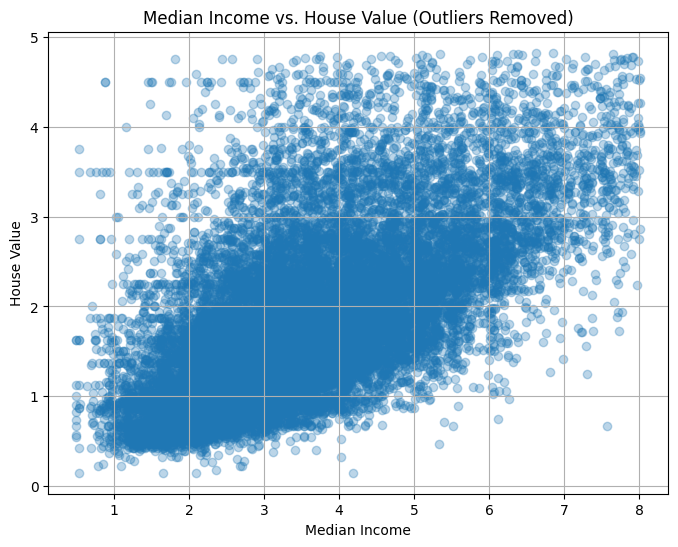

In [13]:
df = non_outliers
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Median Income'], df['House Value'], alpha=0.3)  # alpha for transparency
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Median Income vs. House Value (Outliers Removed)")
plt.grid(True)
plt.show()

## Build and Apply the Simple Linear Regression Model

In [14]:
X = df['Median Income']
y = df['House Value']

In [15]:
# Calculate the slope and the intercept

def linear_regression(X, y, alpha=0.05):  # Add alpha for the confidence level (default is 0.05)
    X_bar = np.mean(X)
    y_bar = np.mean(y)
    Sxx = np.sum((X - X_bar) ** 2)
    Sxy = np.sum((X - X_bar) * (y - y_bar))
    b1 = Sxy / Sxx
    b0 = y_bar - b1 * X_bar
    predictions = b0 + b1 * X
    residuals = y - predictions

    ss_total = np.sum((y - y_bar) ** 2)
    ss_residual = np.sum(residuals ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    mse = ss_residual / len(y)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(residuals))

    # Adjusted R-squared
    n = len(y)
    p = 1  # Number of predictors
    r_squared_adj = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    # Standard Error and P-value for the slope
    se_b1 = np.sqrt(mse / Sxx)
    t_stat = b1 / se_b1
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n - 2))

    # Estimate variance (s^2)
    rss = np.sum(residuals ** 2)  # Residual Sum of Squares
    s_squared = rss / (n - p - 1)
    variance = s_squared

    # Standard error for b0
    se_b0 = np.sqrt(s_squared * (1 / n + (X_bar ** 2) / Sxx))

    # Confidence Interval for b0 and b1
    t_critical = stats.t.ppf(1 - alpha/2, df=n - 2)  # t-critical value for a given confidence level

    # Confidence intervals for b0 and b1
    ci_b0_lower = b0 - t_critical * se_b0
    ci_b0_upper = b0 + t_critical * se_b0
    ci_b1_lower = b1 - t_critical * se_b1
    ci_b1_upper = b1 + t_critical * se_b1

    metrics = {
        "R_squared": r_squared,
        "Adjusted_R_squared": r_squared_adj,
        "Mean_Square_Error": mse,
        "Root_Mean_Square_Error": rmse,
        "Mean_Absolute_Error": mae,
        "P_value_for_slope": p_value,
        "Variance_Estimation": variance,
        "RSS/n": rss / n,
        "Standard_Error_b0": se_b0,  # Standard error of b0
        "Standard_Error_b1": se_b1,  # Standard error of b1
        "CI_b0_lower": ci_b0_lower,  # Confidence interval lower for b0
        "CI_b0_upper": ci_b0_upper,  # Confidence interval upper for b0
        "CI_b1_lower": ci_b1_lower,  # Confidence interval lower for b1
        "CI_b1_upper": ci_b1_upper   # Confidence interval upper for b1
    }

    return b0, b1, predictions, residuals, metrics

β0, β1, predictions, residuals, metrics = linear_regression(X, y)

print('β0: ', β0)
print('β1: ', β1)
print(f"Our model is: y ={β1: .2f}x +{β0: .2f}")

print("---")
print("Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

β0:  0.4324600663603144
β1:  0.40337248042828244
Our model is: y = 0.40x + 0.43
---
Metrics:
R_squared: 0.3927
Adjusted_R_squared: 0.3926
Mean_Square_Error: 0.5291
Root_Mean_Square_Error: 0.7274
Mean_Absolute_Error: 0.5574
P_value_for_slope: 0.0000
Variance_Estimation: 0.5292
RSS/n: 0.5291
Standard_Error_b0: 0.0140
Standard_Error_b1: 0.0036
CI_b0_lower: 0.4050
CI_b0_upper: 0.4599
CI_b1_lower: 0.3963
CI_b1_upper: 0.4104


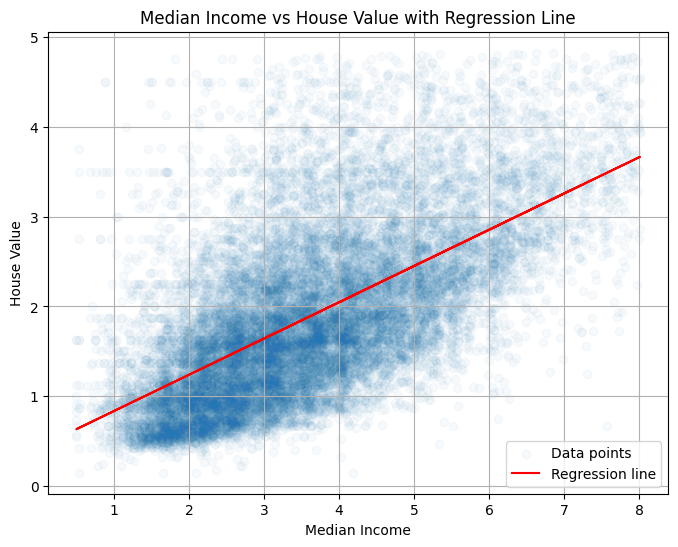

In [16]:
# Scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.03, label="Data points")

# Plot the regression line
regression_line = β1 * X + β0
plt.plot(X, regression_line, color='red', label="Regression line")

# Add labels and title
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Median Income vs House Value with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Shuffle the DataFrame
np.random.seed(1)
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# Number of chunks
n_chunks = 100

# Split the shuffled DataFrame into 100 chunks and store them in a list
chunks = np.array_split(shuffled_df, n_chunks)

# Verify by checking the number of chunks
print(f"Total chunks: {len(chunks)}")
print(f"First chunk:\n{chunks[0].head()}")  # Display the first chunk for verification

Total chunks: 100
First chunk:
   Median Income  House Value
0         3.9028        1.268
1         6.1404        3.684
2         5.0407        3.149
3         1.4904        2.750
4         1.6602        0.612


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
b0, b1, pred, resi, metri = linear_regression(chunks[0]['Median Income'], chunks[0]['House Value'])

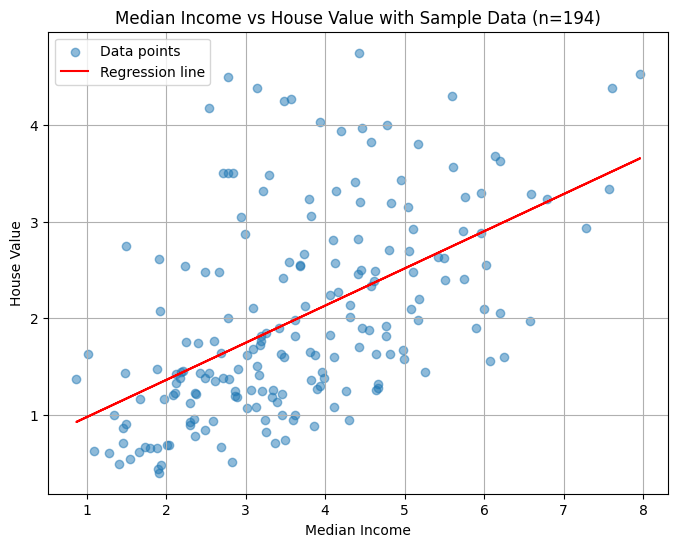

In [19]:
# Scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(chunks[0]['Median Income'], chunks[0]['House Value'], alpha=0.5, label="Data points")

# Plot the regression line
regression_line = b1 * chunks[0]['Median Income'] + b0
plt.plot(chunks[0]['Median Income'], regression_line, color='red', label="Regression line")

# Add labels and title
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title(f"Median Income vs House Value with Sample Data (n={len(chunks[0])})")
plt.legend()
plt.grid(True)
plt.show()

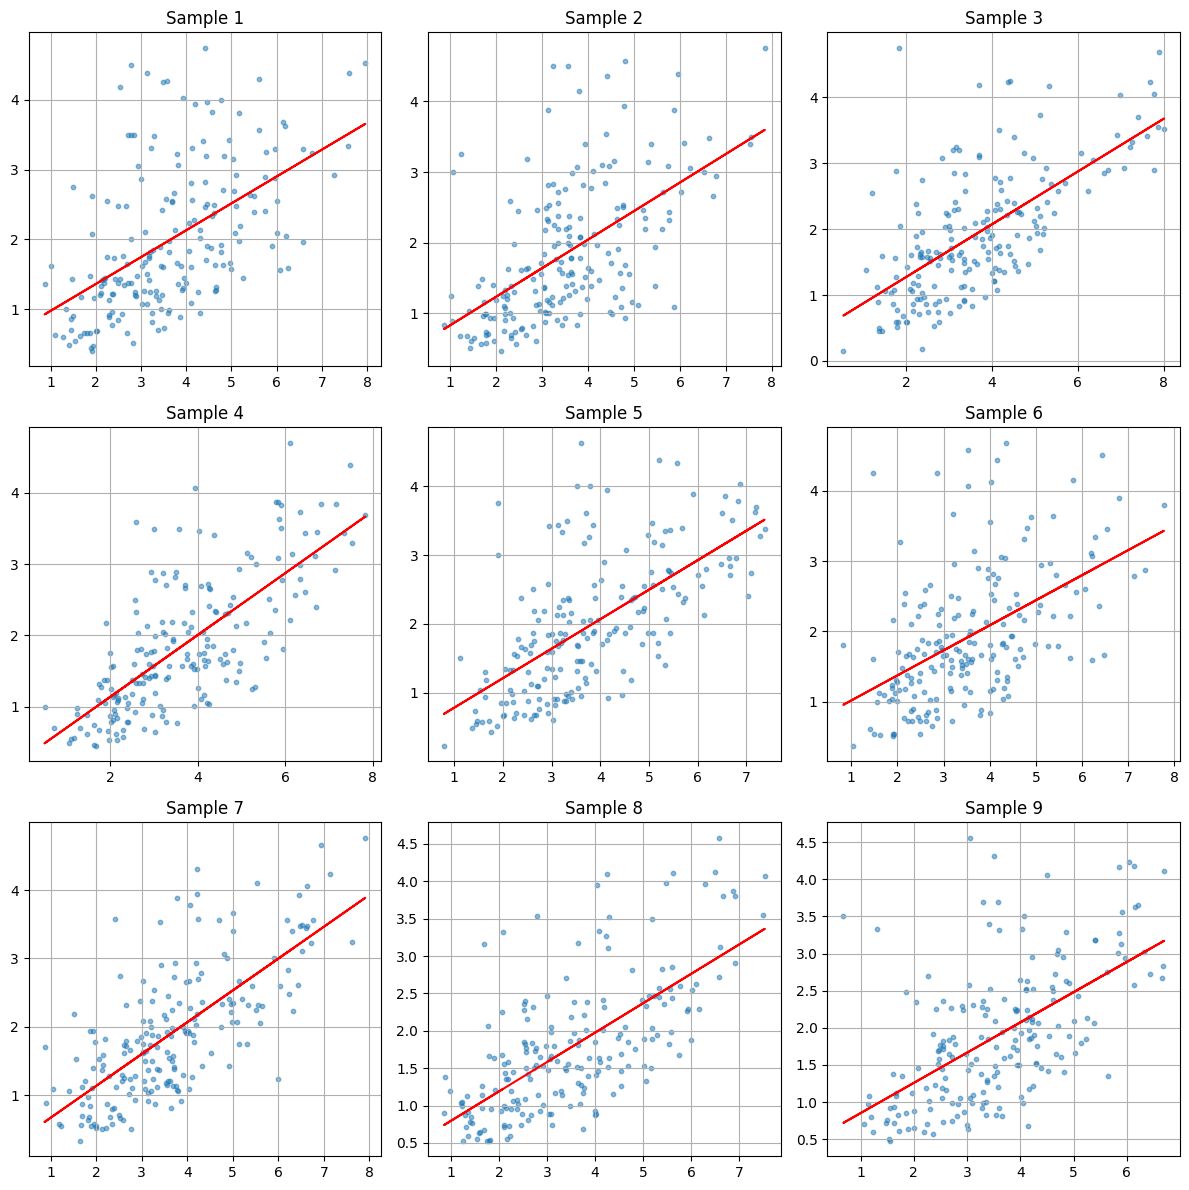

In [20]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through the first 9 chunks (or fewer if less available)
for i in range(min(9, len(chunks))):  # Make sure we don't exceed the number of chunks
    chunk = chunks[i]

    # Extract x and y values from the chunk
    X = chunk['Median Income'].values
    y = chunk['House Value'].values

    # Calculate the slope and intercept for the current chunk
    b0, b1, pred, resi, metri = linear_regression(X, y)

    # Scatter plot of the data
    axes[i].scatter(X, y, alpha=0.5, s = 10 ,label="Data points")

    # Plot the regression line
    regression_line = b1 * X + b0
    axes[i].plot(X, regression_line, color='red', label="Regression line")

    # Add labels and title
    axes[i].set_title(f"Sample {i+1}")
    axes[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [21]:
# Print regression results for each chunk
for i in range(min(9, len(chunks))):
    chunk = chunks[i]
    X = chunk['Median Income'].values
    y = chunk['House Value'].values
    b0, b1, pred, resi, metri = linear_regression(X, y)
    print(f"Sample {i+1}: y ={b1: .2f}x +{b0: .2f}")

Sample 1: y = 0.39x + 0.59
Sample 2: y = 0.40x + 0.43
Sample 3: y = 0.40x + 0.47
Sample 4: y = 0.43x + 0.27
Sample 5: y = 0.43x + 0.35
Sample 6: y = 0.36x + 0.66
Sample 7: y = 0.47x + 0.20
Sample 8: y = 0.39x + 0.40
Sample 9: y = 0.41x + 0.44


## Inferences

### Distribution of **Slopes (b1)** and **Intercepts (b0)** of the Models from the Samples

In [22]:
# Lists to store b0 and b1 values for each chunk
b0_values = []
b1_values = []
vaiances = []
metris = []

# Loop through the chunks and calculate b0 and b1 for each
for chunk in chunks:
    X = chunk['Median Income'].values
    y = chunk['House Value'].values

    b0, b1, pred, resi, metri = linear_regression(X, y)

    # Store the values
    b0_values.append(b0)
    b1_values.append(b1)
    vaiances.append(metri['Variance_Estimation'])
    metris.append(metri)

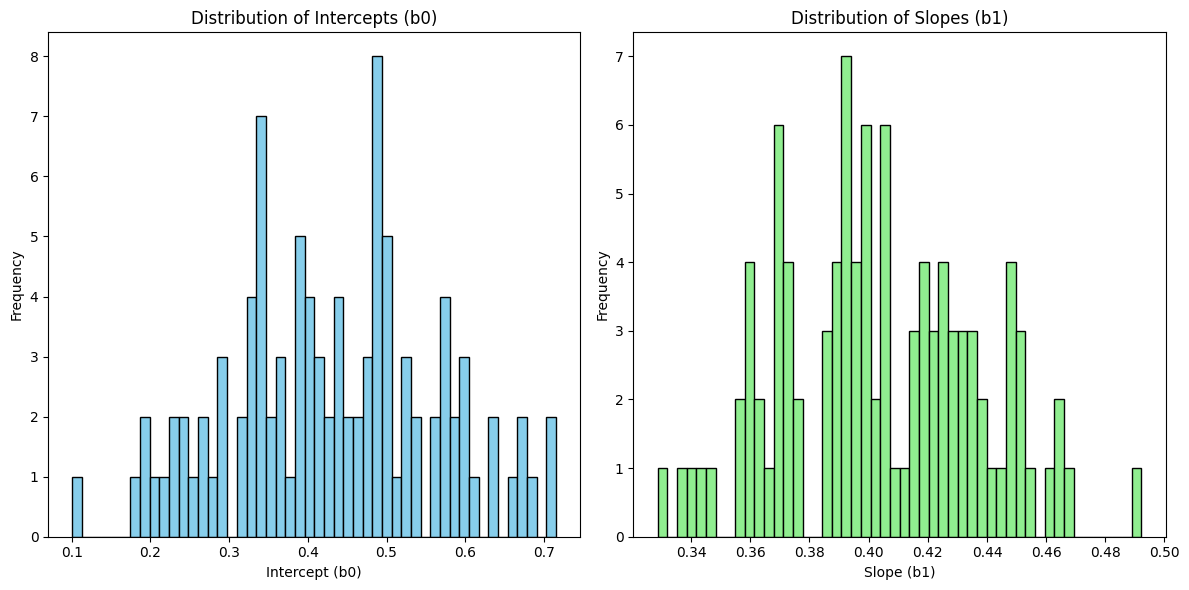

In [23]:
# Plot the distribution of b0 and b1 values
plt.figure(figsize=(12, 6))

# Subplot for b0 values (intercept)
plt.subplot(1, 2, 1)
plt.hist(b0_values, bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Intercept (b0)')
plt.ylabel('Frequency')
plt.title('Distribution of Intercepts (b0)')

# Subplot for b1 values (slope)
plt.subplot(1, 2, 2)
plt.hist(b1_values, bins=50, edgecolor='black', color='lightgreen')
plt.xlabel('Slope (b1)')
plt.ylabel('Frequency')
plt.title('Distribution of Slopes (b1)')

# Adjust layout
plt.tight_layout()
plt.show()

> As you can see, the distribution of both b0 and b1 are approximately normal.\
This suggests that under standard regression assumptions, both estimators are unbiased:

- b1 is unbiased for β1
- b0 is unbiased for β0

> Given that, we can conclude that the linear regression estimators are performing well :)

In [24]:
b0_bar = np.mean(b0_values)
b1_bar = np.mean(b1_values)

print('Mean b0:', b0_bar)
print('Mean b1:', b1_bar)

print(f"Model with the mean of b0 and b1's is: y ={b1_bar: .2f}x +{b0_bar: .2f}")
print(f"Model with our population data is: y ={β1: .2f}x +{β0: .2f}")

Mean b0: 0.4307345385831326
Mean b1: 0.4037979060131434
Model with the mean of b0 and b1's is: y = 0.40x + 0.43
Model with our population data is: y = 0.40x + 0.43


### Variances

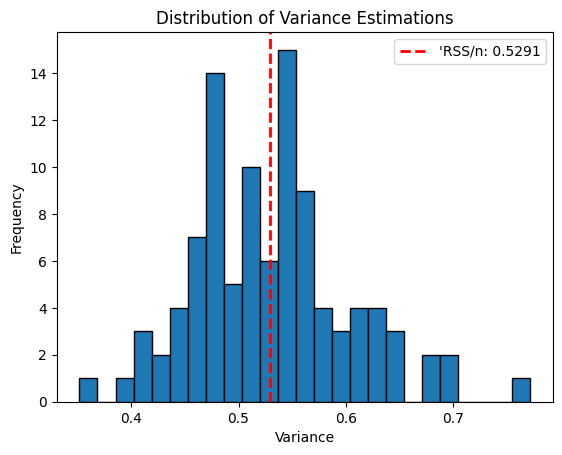

In [25]:
variances = np.array(vaiances)

# Plot the histogram
plt.hist(variances, bins=25, edgecolor='black')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Distribution of Variance Estimations')

# Plot a red vertical line at the actual variance
plt.axvline(metrics['RSS/n'], color='red', linestyle='dashed', linewidth=2, label=f"'RSS/n: {metrics['RSS/n']:.4f}")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [26]:
variances_bar = np.mean(variances)

print(f"Mean variance estimations of the samples: {variances_bar: .3f}")
print(f"The variance of the population data: {metrics['RSS/n']: .3f}")

Mean variance estimations of the samples:  0.530
The variance of the population data:  0.529


> This shows us that the **_RSS/(n-2) = ∑​(yi − ŷi)^2 / n-2_** is an unbiased estimator of the variance of the population. \


> This variance is the residual variance or error variance in the context of linear regression.



### Confidence Intervals

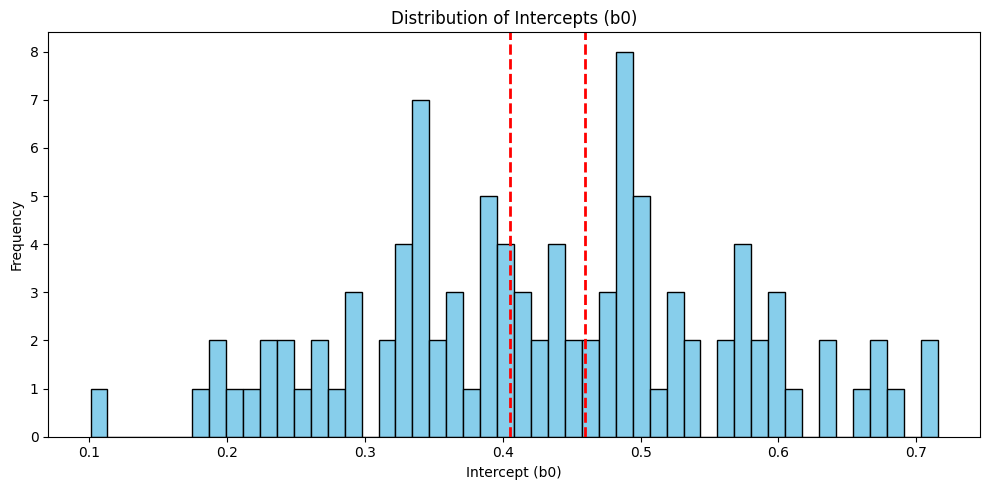

In [35]:
# Plot the distribution of the b0 values
plt.figure(figsize=(10, 5))

plt.hist(b0_values, bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Intercept (b0)')
plt.ylabel('Frequency')
plt.title('Distribution of Intercepts (b0)')

# Plot a red vertical line at the lower CI  of b0
plt.axvline(metrics['CI_b0_lower'], color='red', linestyle='dashed', linewidth=2, label=f"'RSS/n: {metrics['CI_b0_lower']:.4f}")
plt.axvline(metrics['CI_b0_upper'], color='red', linestyle='dashed', linewidth=2, label=f"'RSS/n: {metrics['CI_b0_upper']:.4f}")

plt.tight_layout()
plt.show()

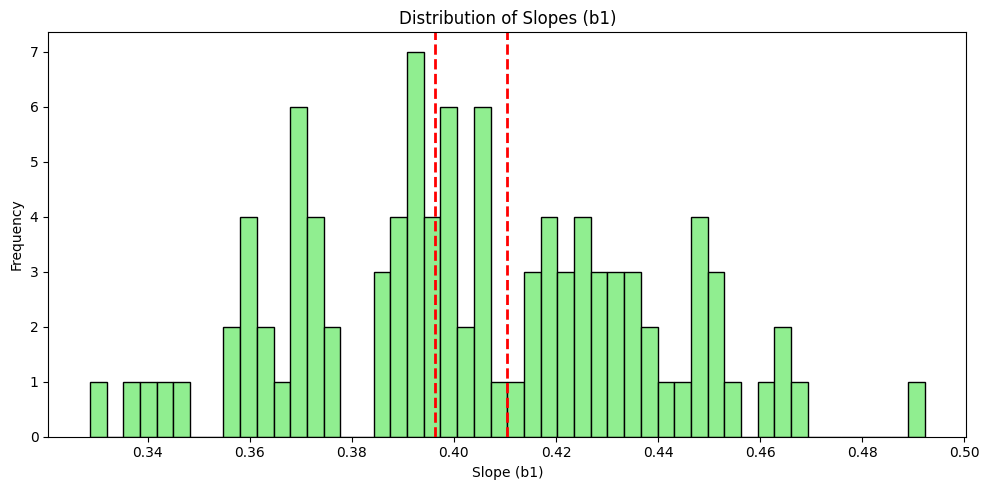

In [28]:
# Plot the distribution of the b1 values
plt.figure(figsize=(10, 5))

plt.hist(b1_values, bins=50, edgecolor='black', color='lightgreen')
plt.xlabel('Slope (b1)')
plt.ylabel('Frequency')
plt.title('Distribution of Slopes (b1)')

# Plot a red vertical line at the lower CI  of b0
plt.axvline(metris[0]['CI_b1_lower'], color='red', linestyle='dashed', linewidth=2, label=f"CI b1 lower: {metris[0]['CI_b1_lower']:.4f}")
plt.axvline(metris[0]['CI_b1_upper'], color='red', linestyle='dashed', linewidth=2, label=f"CI B1 upper: {metris[0]['CI_b1_upper']:.4f}")

plt.tight_layout()
plt.show()

In [29]:
print(f"'RSS/n: {metrics['CI_b1_upper']:.4f}")

'RSS/n: 0.4104
